In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sys
from sklearn.metrics import make_scorer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import recall_score # métrica de evaluación
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import itertools
import sys

Hagamos una predicción, usando incluso un modelo muy simple

In [ ]:
df = pd.read_csv("../datasets/vastSearchEffect.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.3)

In [74]:
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f32,f33,f34,f35,f36,f37,f38,f39,f40,target
0,3,3,3,1,1,4,0,1,1,0,...,2,1,0,0,3,0,1,2,3,0
1,0,3,4,1,4,1,3,2,0,0,...,1,3,3,4,4,2,4,3,0,1
2,3,0,1,1,1,4,3,4,2,1,...,0,0,2,2,3,1,0,0,3,0
3,4,2,4,3,2,3,0,4,1,0,...,3,4,2,1,1,4,2,0,3,0
4,0,4,1,4,2,0,0,1,2,0,...,4,2,3,0,4,3,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,0,2,1,1,4,1,4,1,1,...,1,3,1,3,2,1,2,4,0,1
96,3,3,1,3,0,0,3,0,1,1,...,1,0,2,1,1,2,1,2,4,1
97,0,0,1,2,3,2,0,4,3,3,...,4,1,0,2,1,1,4,1,4,1
98,3,3,2,3,4,4,2,3,4,3,...,4,2,1,1,3,2,0,1,1,1


In [20]:
#40	7	sqrt	4	0.736842	7
#44	7	sqrt	2 6
clf = RandomForestClassifier(n_estimators=44,
                            max_depth=7,
                            max_features='sqrt',
                            min_samples_split=2,
                            random_state=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)    
or_recall = recall_score(y_test, y_pred)
print("recall: {:.2f}".format(or_recall))

recall: 0.75


Permuto/Mezclo el target para romper toda relación con las variables predictoras ¿Sigo obteniendo un buen score?

100%|██████████| 500/500 [59:54<00:00,  7.19s/it] 


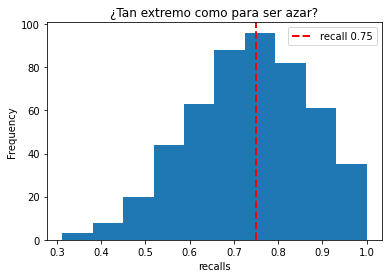

In [22]:
from tqdm import tqdm

n_estimators = range(35, 51, 3)
max_depth = range(4, 8)
max_features = ['sqrt']
min_samples_split = range(3, 5, 1) 
random_state = [8]

param_grid={"n_estimators": n_estimators,
            "max_depth": max_depth,
            "max_features": max_features,
            "min_samples_split": min_samples_split,
            "random_state": random_state}


permutations = 500
recalls = []


for i in  tqdm(range(permutations)):
    y_train = np.random.permutation(y_train)
    gscv = GridSearchCV(clf, 
                    param_grid=param_grid,
                    scoring=make_scorer(recall_score),
                    cv=3,
                    n_jobs=-1,
                    verbose=0)
    gscv.fit(X_train, y_train)
    y_pred = gscv.predict(X_test)
    recalls.append(recall_score(y_test, y_pred))

plt.hist(recalls, bins=10)
plt.xlabel("recalls") 
plt.ylabel("Frequency")
plt.axvline(x=or_recall, color='red', linestyle='--', linewidth=2, label="recall {:.2f}".format(or_recall))
# Añadir etiquetas y leyenda
plt.title('¿Tan extremo como para ser azar?')
plt.legend()
plt.show()  


El ejemplo pretende mostrar que "algo interesante" puede surgir por casualidad.

Si el p-value es bajo (ej. <0.05), significa que el rendimiento/correlación real es significativamente mejor que el esperado por azar → probablemente no espurio. Si el p-value es alto, tu hallazgo podría ser producto del azar.

----

### Generación del dataset

### Como se ve fue totalmente aleatorio

In [14]:
np.random.seed(40)
# Configuración
n_samples               = 100  # Número de filas
n_features              = 40  # Número de columnas de características
categories_per_feature  = 3  # Número de categorías por columna

# Generar características categóricas aleatorias
X = np.random.randint(0, categories_per_feature, size=(n_samples, n_features))

# Generar la variable objetivo binaria aleatoria
y = np.random.randint(0, 2, size=n_samples)

# Crear DataFrame
columns = [f"f{i+1}" for i in range(n_features)]
df = pd.DataFrame(X, columns=columns)
df["target"] = y

df.to_csv("../datasets/vastSearchEffect.csv", index=False)


Vast Search effect

In [16]:
df = pd.read_csv("../datasets/vastSearchEffect.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.3)

n_estimators = range(29, 49, 3)
max_depth = range(3, 9)
max_features = ['sqrt']
min_samples_split = range(2, 8, 2) 
random_state = [5,6,7,8,9]

param_grid={"n_estimators": n_estimators,
            "max_depth": max_depth,
            "max_features": max_features,
            "min_samples_split": min_samples_split,
            "random_state": random_state}
    

comb = itertools.product(n_estimators, max_depth, max_features, min_samples_split, random_state)
# Iterar sobre el resultado
scores = []
for n_estimators, max_depth, max_features, min_samples_split, random_state in comb:
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                max_features=max_features,
                                min_samples_split=min_samples_split,
                                random_state=random_state)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)    
    or_recall = recall_score(y_test, y_pred)
    scores.append({"n_estimators": n_estimators,
                "max_depth": max_depth,
                "max_features": max_features,
                "min_samples_split": min_samples_split,
                "recall": or_recall,
                "random_state": random_state,
                "model": clf.get_params()})

df_results = pd.DataFrame(scores)
df_results.sort_values(by="recall", ascending=False).iloc[0:20]#!/usr/bin/env python3


,n_estimators,max_depth,max_features,min_samples_split,recall,random_state,model
271,38,3,sqrt,2,0.875,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
191,35,3,sqrt,6,0.875,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
451,44,3,sqrt,2,0.875,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
181,35,3,sqrt,2,0.875,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
183,35,3,sqrt,2,0.875,8,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
371,41,3,sqrt,6,0.875,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
186,35,3,sqrt,4,0.875,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
543,47,3,sqrt,2,0.875,8,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
276,38,3,sqrt,4,0.875,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
366,41,3,sqrt,4,0.875,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."


In [19]:
df_results.sort_values(by="recall", ascending=False).iloc[80:90]#!/usr/bin/env python3

,n_estimators,max_depth,max_features,min_samples_split,recall,random_state,model
457,44,3,sqrt,4,0.8125,7,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
306,38,5,sqrt,4,0.8125,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
47,29,6,sqrt,2,0.8125,7,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
116,32,4,sqrt,6,0.8125,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
42,29,5,sqrt,6,0.8125,7,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
177,32,8,sqrt,6,0.8125,7,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
282,38,3,sqrt,6,0.8125,7,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
452,44,3,sqrt,2,0.8125,7,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
617,47,8,sqrt,2,0.8125,7,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
511,44,7,sqrt,2,0.7500,6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
